In [13]:
import numpy as np
import cv2
cap = cv2.VideoCapture("O_and_c//GHZ_info.avi")
while(True):
    ret, frame = cap.read()
    cv2.rectangle(frame, (100, 100), (200, 200), [255, 0, 0], 2)
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

OpenCV: Couldn't read video stream from file "O_and_c//GHZ_info.avi"
[ERROR:0@657.365] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap.cpp (166) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): O_and_c//GHZ_info.avi in function 'icvExtractPattern'




error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:1000: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


TypeError: draw() got an unexpected keyword argument 'block'

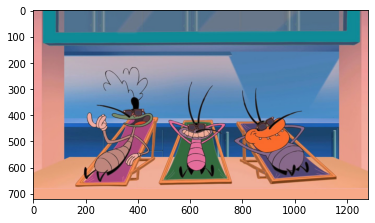

In [15]:
const myWindow = window.open("", "", "width=200, height=100");
setTimeout(function() {myWindow.close()}, 3000);

In [ ]:
import sys
print(sys.path)

In [ ]:
import time
import random
import sys

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, BasicAer, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
#from azure.quantum.qiskit import AzureQuantumProvider
from qiskit.utils import algorithm_globals
from qiskit.utils import QuantumInstance
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import Initialize

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys

#backend = provider.get_backend("ionq.simulator")
backend = BasicAer.get_backend('qasm_simulator')
sim = Aer.get_backend('aer_simulator')

# just of effects. add a delay of 1 second before performing any action
SLEEP_BETWEEN_ACTIONS = 0.01
SCORE = 0

single_q_gates = ['h', 'x', 'y', 'I', 'z', 's', 'sdg', 't', 'tdg'] 
single_q_param_gates = ['rx', 'ry', 'rz', 'u', 'p']

ket_0 = np.array([[1],[0]])
iota = 1j
def u3_mat(theta, phi, lambda_v):
    matrix_gen = np.array(([np.cos(theta/2), -(np.exp(iota*lambda_v))*np.sin(theta/2)],[(np.exp(iota*phi))*np.sin(theta/2), (np.exp(iota*(phi+lambda_v)))*np.cos(theta/2)]))
    return matrix_gen

def welcome_msg():
    msg = """
    Welcome to the Tom and Jerry in Quantum verse
    Version: 1.0.0
    Developed by: Utkarsh Singh
    
    Rules:
      1. There are a totatl of 3 levels in the game.
      2. To win the game you must complete all the levels. 
      3. Press enter to board the spacecraft.
    
    """
    print(msg)
    
def my_float(s):
    constants = {"pi": 3.14159, "e": 2.71928}
    if s in constants:
        return constants[s]
    else:
        return float(s)

def draw_img(adrs):
    ImageItself = Image.open(adrs)
    #ImageNumpyFormat = np.asarray(ImageItself)
    plt.imshow(ImageItself)
    plt.show(block = False)
    plt.pause(1) # pause how many seconds
    plt.close('all')

#draw_img('O&C/1.png')

def eng_circuit(theta, phi, lamb, g):
    q =QuantumRegister(1, 'q')
    c = ClassicalRegister(1, 'c')
    qc = QuantumCircuit(q,c)
    state = u3_mat(theta, phi, lamb).dot(ket_0)
    psi = Statevector(state)
    init_gate = Initialize(psi)
    init_gate.label = "code"
    qc.append(init_gate, [0])
    
    for i in range(len(g)):
        if type(g[i]) is tuple:
            
            gate = g[i][0]
            param = float(g[i][1])
            if gate == 'rx':
                qc.rx(param , [0]) 
            elif gate == 'ry':
                qc.ry(param, [0])
            elif gate == 'rz':
                qc.rz(param, [0])
            elif gate == 'u':
                qc.u(param, [0])
            elif gate == 'p':
                qc.p(param, [0])
            else:
                pass
        else:
            if g[i] == 'h':
                qc.h([0])
            elif g[i] == 'x':
                qc.x([0])
            elif g[i] == 'y':
                qc.y([0])
            elif g[i] == 'z':
                qc.z([0])
            elif g[i] == 'i':
                qc.barrier()
            elif g[i] == 't':
                qc.t([0])
            elif g[i] == 'tdg':
                qc.tdg([0])
            elif g[i] == 's':
                qc.s([0])
            elif g[i] == 'sdg':
                qc.sdg([0])
            else:
                pass
    qc.measure([0],[0])
    # sim = Aer.get_backend('aer_simulator')
    qc.save_statevector()
    res = sim.run(qc, shots = 1000).result().get_counts()
    return res


def eng_gate_op():
    # print("Enter the gate(s) to reset the first Qubit.")
    g1 = input("Apply first Quantum gate").lower()
    if g1 in single_q_param_gates:
        param = my_float(input("Parameter value ="))
        g1 = (g1, param)
    else:
        pass 
    
    in1 = input("Do you want to apply more gates? (Y/N)").upper()
    if in1 == 'Y':
        g2 = input("Apply 2nd quantum operation:").lower()
        if g2 in single_q_param_gates:
            param2 = my_float(input("Parameter value ="))
            g2 = (g2, param2)
        else:
            pass 
    else:
        g2 = 'I'
        
    in2 = input("Do you want to apply more gates? (Y/N)").upper()
    if in2 == 'Y':
        g3 = input("Apply last quantum operation:").lower()
        if g3 in single_q_param_gates:
            param3 = my_float(input("Parameter value ="))
            g3 = (g3, param3)
        else:
            pass 
    else:
        g3 = 'I'
    return [g1, g2, g3]

def level_one(gate1, gate2, gate3, score):
    counts1 = eng_circuit(np.pi/4,3*np.pi/4,0, gate1) #initial state of the qubit1: u3(np.pi/4, 3*np.pi/4, 0)
    counts2 = eng_circuit(np.pi/2,np.pi/2,0, gate2) #initial state of the qubit2: u3(np.pi/2, np.pi/2, 0)
    counts3 = eng_circuit(np.pi/2,3*np.pi/2,0, gate3) #initial state of the qubit3: u3(np.pi/2, 3*np.pi/2, 0)
    key_counts1 = [ key1 for key1 in counts1 if counts1[key1] >40]
    key_counts2 = [ key2 for key2 in counts2 if counts2[key2] >40]
    key_counts3 = [ key3 for key3 in counts3 if counts3[key3] >40]
    key_counts = key_counts1 + key_counts2 + key_counts3
    #SCORE = 0
    if '1' in key_counts:
        score = score
        print(counts1, counts2, counts3)
        print("Game Over")
    else:
        score = score + 100
        print('Engine is ready to launch!')


def TJ():
    #time.sleep(SLEEP_BETWEEN_ACTIONS)
    draw_img('O&C/1.png')
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    draw_img('O&C/2.png')
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    draw_img('O&C/3.png')
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    
    input("Press Enter to play the game")
    welcome_msg()
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    draw_img('O&C/gif1.gif')
    draw_img('O&C/eng.png')    
    #time.sleep(SLEEP_BETWEEN_ACTIONS)
    print("Enter the gate(s) to reset the first (leftmost) Qubit.")
    gate1 = eng_gate_op()
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    print("Enter the gate(s) to reset the second Qubit.")
    gate2 = eng_gate_op()
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    print("Enter the gate(s) to reset the third Qubit.")
    gate3 = eng_gate_op()
    level_one(gate1, gate2, gate3, SCORE)
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    
    if SCORE == 100:
        print("Welcome to the Level-2")
        print("You are in Outer space, you have no idea where Jack is!")
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    
TJ()